In [1]:
import pandas as pd

In [2]:
age_changes_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/age_changes.csv")
hist_adult_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-adult.csv")
hist_child_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-child.csv")
hist_sibl_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/background_history-sibling.csv") 
basic_med_scr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/basic_medical_screening.csv", low_memory=False) # => use this
# has lots of empty fields

clin_lab_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/clinical_lab_report.csv")
# "asd" - bool, diaagnosis field
# sex

#  Developmental Coordination Disorder Questionnaire (DCDQ)
dcdq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/dcdq.csv")
# all ads = True

individuals_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/individuals.csv")
# descriptive vars about participants such as sex, race, diagnosis (Autism Spectrum Disorder, Autism or Autistic Disorder, Asperger's Disorder, Other)


# Repetitive Behavior Scale-Revised (RBS-R)
rbsr_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/rbs-r.csv")
roles_index_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/roles_index.csv", low_memory=False)
# Social-Communication Questionnaire (csq)
scq_df = pd.read_csv("/home/eidf128/eidf128/stirkova_big_eidf/SPARK/scq.csv")



In [3]:
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("dcdq_df shape:", dcdq_df.shape)
print("rbsr_df shape:", rbsr_df.shape)
print("scq_df shape:", scq_df.shape) # siblings only
print()
print("age_changes_df shape:", age_changes_df.shape)
print("hist_adult_df shape:", hist_adult_df.shape)
print("hist_child_df shape:", hist_child_df.shape)
print("hist_sibl_df shape:", hist_sibl_df.shape)
print("clin_lab_df shape:", clin_lab_df.shape)
print("individuals_df shape:", individuals_df.shape)
print("roles_index_df shape:", roles_index_df.shape)

basic_med_scr_df shape: (134213, 135)
dcdq_df shape: (24656, 35)
rbsr_df shape: (33572, 65)
scq_df shape: (63172, 55)

age_changes_df shape: (121, 2)
hist_adult_df shape: (2788, 122)
hist_child_df shape: (34373, 117)
hist_sibl_df shape: (14459, 40)
clin_lab_df shape: (521, 55)
individuals_df shape: (230936, 37)
roles_index_df shape: (90914, 33)


In [4]:
branching_features = ['dev_lang', 'dev_lang_dis', 'dev_ld', 'dev_motor', 'dev_mutism', 'dev_soc_prag', 'dev_speech', 
'attn_behav', 'behav_adhd', 'behav_conduct', 'behav_intermitt_explos', 'behav_odd', 
'mood_or_anx', 'mood_anx', 'mood_bipol', 'mood_dep', 'mood_dmd', 'mood_hoard', 'mood_ocd', 'mood_sep_anx', 'mood_soc_anx']

### Exploring branching features

In [5]:
features_dev = ['dev_lang', 'dev_lang_dis', 'dev_ld', 'dev_motor', 'dev_mutism', 'dev_soc_prag', 'dev_speech']
features_behav = ['attn_behav', 'behav_adhd', 'behav_conduct', 'behav_intermitt_explos', 'behav_odd']
features_mood = ['mood_or_anx', 'mood_anx', 'mood_bipol', 'mood_dep', 'mood_dmd', 'mood_hoard', 'mood_ocd', 'mood_sep_anx', 'mood_soc_anx']

dev_df = basic_med_scr_df[features_dev]
behav_df = basic_med_scr_df[features_behav]
mood_df = basic_med_scr_df[features_mood]

In [6]:
# df = dev_df
# cat = 'dev_lang'
df = behav_df
cat = 'attn_behav'
df = mood_df
cat = 'mood_or_anx'

filtered_dev_df = df[df[cat] == 1]
# filtered_dev_df = df[pd.isna(df[cat])]

# Step 2: Drop the 'dev_lang' column
filtered_dev_df_no_lang = filtered_dev_df.drop(columns=[cat])

# Step 3: Calculate the sum of all remaining columns for each row
row_sums = filtered_dev_df_no_lang.sum(axis=1)

print(row_sums.sum())
row_sums

84931.0


1         4.0
5         2.0
6         1.0
7         1.0
8         1.0
         ... 
134193    1.0
134202    2.0
134205    3.0
134211    2.0
134212    2.0
Length: 47727, dtype: float64

In [7]:
# for dev_df[dev_lang] == 1, there are some sums that are 0
# for dev_df[dev_lang] == 0, there are all sums are 0
# same for other two dfs

### Filtering data

In [8]:
# Records suspected of containing invalid data reported by parents are
# indicated by the basic_medical_measure_validity flag value of 1. This
# includes individuals reporting multiple incompatible diagnoses, and infants
# reported to have psychiatric diagnoses.

# remove invalid info
basic_med_scr_df = basic_med_scr_df[basic_med_scr_df['basic_medical_measure_validity_flag'] != 1]

# only keep columns with at most x% missing data
percentage_missing = 80
missing_threshold = len(basic_med_scr_df) * (1 - percentage_missing/100)
basic_med_scr_df_small = basic_med_scr_df.dropna(thresh=missing_threshold, axis=1)
print("basic_med_scr_df shape:", basic_med_scr_df.shape)
print("basic_med_scr_df_small shape:", basic_med_scr_df_small.shape)


basic_med_scr_df shape: (134048, 135)
basic_med_scr_df_small shape: (134048, 25)


In [9]:
columns_subset = basic_med_scr_df_small.columns.to_list()
print(columns_subset)

['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex', 'depend_adult', 'asd', 'age_at_eval_months', 'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc', 'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test', 'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx', 'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc', 'eval_year']


In [10]:
# Adding in the branching features, convert to set to remove duplicates
basic_med_scr_df_small = basic_med_scr_df[list(set(branching_features + columns_subset))]
basic_med_scr_df_small

,respondent_sp_id,neuro_oth_calc,behav_conduct,mood_anx,mood_dmd,biomother_id,gen_test,mood_soc_anx,age_at_eval_months,gen_dx_oth_calc_self_report,...,depend_adult,behav_adhd,dev_lang_dis,dev_ld,mood_bipol,family_id,biofather_id,eval_year,growth_oth_calc,age_at_eval_years
0,SP0000002,0,NaN,NaN,NaN,SP0000002,1.0,NaN,123,0,...,False,1.0,1.0,NaN,NaN,SF0000003,NaN,2016,0,10
1,SP0000002,0,NaN,1.0,NaN,NaN,1.0,1.0,369,0,...,False,1.0,NaN,NaN,1.0,SF0000003,NaN,2016,0,30
2,SP0000010,0,NaN,NaN,NaN,NaN,1.0,NaN,452,0,...,False,NaN,NaN,NaN,NaN,SF0000013,NaN,2016,0,37
3,SP0000010,0,NaN,NaN,NaN,SP0000010,1.0,NaN,168,0,...,False,1.0,NaN,NaN,NaN,SF0000013,NaN,2016,0,14
4,SP0000017,0,NaN,NaN,NaN,NaN,0.0,NaN,611,0,...,False,NaN,NaN,NaN,NaN,SF0000017,NaN,2016,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134208,SP0390283,0,NaN,NaN,NaN,SP0390283,0.0,NaN,5,0,...,False,NaN,NaN,NaN,NaN,SF0390284,NaN,2020,0,0
134209,SP0390283,1,NaN,NaN,NaN,SP0390283,0.0,NaN,18,0,...,False,NaN,1.0,NaN,NaN,SF0390284,NaN,2020,0,1
134210,SP0390283,0,NaN,NaN,NaN,NaN,0.0,NaN,359,0,...,False,NaN,NaN,NaN,NaN,SF0390284,NaN,2020,0,29
134211,SP0323183,0,NaN,NaN,NaN,NaN,0.0,NaN,314,0,...,False,NaN,NaN,NaN,1.0,SF0390299,NaN,2019,0,26


In [11]:
# print(nan_percentage_no_asd)
# Iterate through each column in the DataFrame
for column in basic_med_scr_df_small.columns:
    # Calculate the percentage of NaN values for patients with ASD
    nan_percentage_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == True][column].isna().mean() * 100
    # Calculate the percentage of NaN values for patients without ASD
    nan_percentage_no_asd = basic_med_scr_df_small[basic_med_scr_df_small['asd'] == False][column].isna().mean() * 100
    
    # Print the percentages for the current column
    print(f"{column}: ASD - {nan_percentage_asd:.2f}% | No ASD - {nan_percentage_no_asd:.2f}%")


respondent_sp_id: ASD - 0.00% | No ASD - 0.00%
neuro_oth_calc: ASD - 0.00% | No ASD - 0.00%
behav_conduct: ASD - 97.79% | No ASD - 99.73%
mood_anx: ASD - 77.90% | No ASD - 79.50%
mood_dmd: ASD - 96.99% | No ASD - 99.81%
biomother_id: ASD - 11.92% | No ASD - 74.81%
gen_test: ASD - 0.20% | No ASD - 0.28%
mood_soc_anx: ASD - 88.19% | No ASD - 93.58%
age_at_eval_months: ASD - 0.00% | No ASD - 0.00%
gen_dx_oth_calc_self_report: ASD - 0.00% | No ASD - 0.00%
gen_test_oth_calc: ASD - 0.00% | No ASD - 0.00%
mood_or_anx: ASD - 65.58% | No ASD - 63.66%
asd: ASD - 0.00% | No ASD - 0.00%
attn_behav: ASD - 55.63% | No ASD - 87.40%
dev_motor: ASD - 82.16% | No ASD - 99.09%
mood_dep: ASD - 89.00% | No ASD - 79.00%
mood_ocd: ASD - 89.68% | No ASD - 96.03%
prev_study_oth_calc: ASD - 0.00% | No ASD - 0.00%
behav_intermitt_explos: ASD - 97.90% | No ASD - 99.76%
psych_oth_calc: ASD - 0.00% | No ASD - 0.00%
dev_speech: ASD - 73.21% | No ASD - 97.06%
sex: ASD - 0.00% | No ASD - 0.00%
subject_sp_id: ASD - 0.0

In [12]:

# med_scr_important_cols = ['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id',
#        'biofather_id', 'sex', 'asd', 'age_at_eval_months',
#        'age_at_eval_years', 'attn_behav', 'behav_adhd', 'birth_oth_calc',
#        'dev_lang', 'dev_lang_dis', 'gen_dx_oth_calc_self_report', 'gen_test',
#        'gen_test_oth_calc', 'growth_oth_calc', 'mood_anx', 'mood_or_anx',
#        'neuro_oth_calc', 'prev_study_oth_calc', 'psych_oth_calc']

# all_columns = ['attn_behav', 'mood_ocd', 'family_id', 'asd', 'behav_conduct',
#        'biomother_id', 'gen_test', 'mood_bipol', 'behav_adhd', 'behav_odd',
#        'dev_lang', 'birth_oth_calc', 'mood_soc_anx', 'psych_oth_calc',
#        'eval_year', 'dev_mutism', 'neuro_oth_calc',
#        'gen_dx_oth_calc_self_report', 'prev_study_oth_calc', 'sex', 'mood_anx',
#        'growth_oth_calc', 'dev_soc_prag', 'mood_or_anx', 'age_at_eval_years',
#        'mood_hoard', 'dev_lang_dis', 'respondent_sp_id', 'biofather_id',
#        'depend_adult', 'mood_dep', 'mood_dmd', 'dev_motor',
#        'age_at_eval_months', 'dev_speech', 'behav_intermitt_explos', 'dev_ld',
#        'gen_test_oth_calc', 'mood_sep_anx', 'subject_sp_id']

# possibly_important_cols = ['birth_oth_calc', 'gen_test_oth_calc', 'growth_oth_calc', 'neuro_oth_calc', 'psych_oth_calc', 'gen_dx_oth_calc_self_report']
not_important_cols = ['prev_study_oth_calc', 'gen_test', 'gen_test_oth_calc', 'growth_oth_calc', 
                      'age_at_eval_months', 'age_at_eval_years', 'eval_year', 'depend_adult']

# drop columns that don't seem meaningful
basic_med_scr_df_small = basic_med_scr_df_small.drop(columns=not_important_cols)

columns_not_for_imputation = ['subject_sp_id', 'respondent_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex', 'asd']

# Missing values imputation
columns_to_impute = [col for col in basic_med_scr_df_small.columns if col not in columns_not_for_imputation]
basic_med_scr_df_small[columns_to_impute] = basic_med_scr_df_small[columns_to_impute].fillna(0)



In [13]:
# remove invalid info
individuals_df= individuals_df[(individuals_df['age_validity_flag'] != 1) & (individuals_df['individual_data_validity'] != 1)]


In [14]:

individuals_important_cols = ['subject_sp_id', 'family_id', 'biomother_id', 'biofather_id', 'sex',
       'asd', 'multiple_birth','diagnosis_age', 'diagnosis','cognitive_impairment', 
       'language_level', 'race_asian','race_african_amer', 'race_native_amer', 'race_native_hawaiian',
       'race_white', 'race_other', 'hispanic']

# manually select only relevant colums (e.g. diagnosis source is dropped)
individuals_df_small = individuals_df[individuals_important_cols]

# drop columns that are only relevant for asd
asd_only_columns = ['diagnosis_age', 'diagnosis','cognitive_impairment', 'language_level']
individuals_df_small = individuals_df_small.drop(columns=asd_only_columns)


# Missing values imputation
race_columns = ['race_asian', 'race_african_amer', 'race_native_amer', 'race_native_hawaiian', 'race_white', 'race_other', 'hispanic']
individuals_df_small[race_columns] = individuals_df_small[race_columns].fillna(0)
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].fillna("No")



# turn multiple_birth variable into numeric variable with 0 is No and 1 if Twin or Triplet
individuals_df_small['multiple_birth'] = individuals_df_small['multiple_birth'].map(lambda x: 0 if x == "No" else 1)



In [15]:
common_fields = basic_med_scr_df_small.columns.intersection(individuals_df_small.columns).tolist()
print(common_fields)

['biomother_id', 'asd', 'sex', 'subject_sp_id', 'family_id', 'biofather_id']


In [16]:
print("individuals_df_small before merge:", individuals_df_small.shape)
print("basic_med_scr_df_small before merge:", basic_med_scr_df_small.shape)

med_scr_individuals_df = basic_med_scr_df_small.merge(individuals_df_small, on=common_fields, how='inner')
print("med_scr_individuals_df shape:", med_scr_individuals_df.shape)

individuals_df_small before merge: (226808, 14)
basic_med_scr_df_small before merge: (134048, 32)
med_scr_individuals_df shape: (131811, 40)


In [17]:

# Convert variables to numeric
med_scr_individuals_df['asd'] = med_scr_individuals_df['asd'].map(lambda x: 1 if x == True else 0)
med_scr_individuals_df['sex'] = med_scr_individuals_df['sex'].map(lambda x: 1 if x == "Male" else 0)

In [18]:
med_scr_individuals_df.columns
# id_cols = ['respondent_sp_id', 'family_id', 'biomother_id','biofather_id']
# df = med_scr_individuals_df.drop(id_cols, axis=1)

Index(['respondent_sp_id', 'neuro_oth_calc', 'behav_conduct', 'mood_anx',
       'mood_dmd', 'biomother_id', 'mood_soc_anx',
       'gen_dx_oth_calc_self_report', 'mood_or_anx', 'asd', 'attn_behav',
       'dev_motor', 'mood_dep', 'mood_ocd', 'behav_intermitt_explos',
       'psych_oth_calc', 'dev_speech', 'sex', 'subject_sp_id', 'dev_lang',
       'mood_sep_anx', 'dev_mutism', 'dev_soc_prag', 'behav_odd',
       'birth_oth_calc', 'mood_hoard', 'behav_adhd', 'dev_lang_dis', 'dev_ld',
       'mood_bipol', 'family_id', 'biofather_id', 'multiple_birth',
       'race_asian', 'race_african_amer', 'race_native_amer',
       'race_native_hawaiian', 'race_white', 'race_other', 'hispanic'],
      dtype='object')

In [19]:
# med_scr_individuals_df.to_csv('spark_cleaned_data_more_features.csv', index=False)

## Adding summary score data


In [20]:
dcdq_df_final = dcdq_df[['subject_sp_id','final_score']]
rbsr_df_final = rbsr_df[['subject_sp_id','total_final_score']]
scq_df_final = scq_df[['subject_sp_id','final_score']]

In [21]:
dcdq_rbsr_df = pd.merge(dcdq_df_final, rbsr_df_final, on='subject_sp_id', how='inner')
dcdq_scq_df = pd.merge(dcdq_df_final, scq_df_final, on='subject_sp_id', how='inner')
all_scores_df = pd.merge(dcdq_rbsr_df, scq_df_final, on='subject_sp_id', how='inner')

In [22]:
print("dcdq_df_final shape:", dcdq_df_final.shape)
print("rbsr_df_final shape:", rbsr_df_final.shape)
print("scq_df_final shape:", scq_df_final.shape)
print()
print("dcdq_rbsr_df shape:", dcdq_rbsr_df.shape)
print("dcdq_scq_df shape:", dcdq_scq_df.shape)
print("all_scores_df shape:", all_scores_df.shape)

dcdq_df_final shape: (24656, 2)
rbsr_df_final shape: (33572, 2)
scq_df_final shape: (63172, 2)

dcdq_rbsr_df shape: (24539, 3)
dcdq_scq_df shape: (24375, 3)
all_scores_df shape: (24274, 4)


In [23]:
all_scores_df.rename(columns={'final_score_x':'dcdq_score', 'total_final_score':'rbsr_score', 'final_score_y':'scq_score'}, inplace=True)

In [24]:
all_scores_df.dropna(inplace=True)

In [25]:
print("After cleaning all_scores_df shape:", all_scores_df.shape)

After cleaning all_scores_df shape: (23413, 4)


In [26]:
med_scr_indiv_scores_df = pd.merge(med_scr_individuals_df, all_scores_df, on='subject_sp_id', how='inner')
print("med_scr_indiv_scores_df shape:", med_scr_indiv_scores_df.shape)
med_scr_indiv_scores_df

med_scr_indiv_scores_df shape: (22274, 43)


,respondent_sp_id,neuro_oth_calc,behav_conduct,mood_anx,mood_dmd,biomother_id,mood_soc_anx,gen_dx_oth_calc_self_report,mood_or_anx,asd,...,race_asian,race_african_amer,race_native_amer,race_native_hawaiian,race_white,race_other,hispanic,dcdq_score,rbsr_score,scq_score
0,SP0000002,0,0.0,0.0,0.0,SP0000002,0.0,0,0.0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,22.0,66.0,30.0
1,SP0000010,0,0.0,0.0,0.0,SP0000010,0.0,0,0.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,39.0,39.0,17.0
2,SP0000046,0,0.0,1.0,0.0,SP0000046,0.0,0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0,43.0,23.0
3,SP0001693,0,0.0,1.0,1.0,SP0001693,0.0,0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,74.0,33.0
4,SP0000067,0,0.0,0.0,0.0,SP0000067,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,61.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22269,SP0388517,0,0.0,0.0,0.0,SP0388517,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,27.0,21.0
22270,SP0389017,0,0.0,0.0,0.0,SP0389017,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,6.0,18.0
22271,SP0389113,0,0.0,1.0,0.0,SP0389121,0.0,0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0,20.0,10.0
22272,SP0389130,0,0.0,0.0,0.0,SP0389130,0.0,0,0.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,43.0,10.0,15.0


In [27]:
# med_scr_indiv_scores_df.to_csv('spark_cleaned_more_features_asd_final_scores.csv', index=False)

### Plot summary scores distribution

In [89]:
summary_scores = ['dcdq_score', 'scq_score', 'rbsr_score']
scores_df = med_scr_indiv_scores_df[summary_scores]

In [82]:
cutoff_points = {'dcdq_score': [46,55, 57], 'rbsr_score':[] , 'scq_score':[15] }
# explanations = {'dcdq_score': ['5-7 years', '8-9 years', '10-15 years'], 'rbsr_score':[] , 'scq_score':[]}
explanations = {46: '<46: 5-7 years', 55: '<55: 8-9 years', 57: '<57: 10-15 years', 15: '>15: 4+ years'}


/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


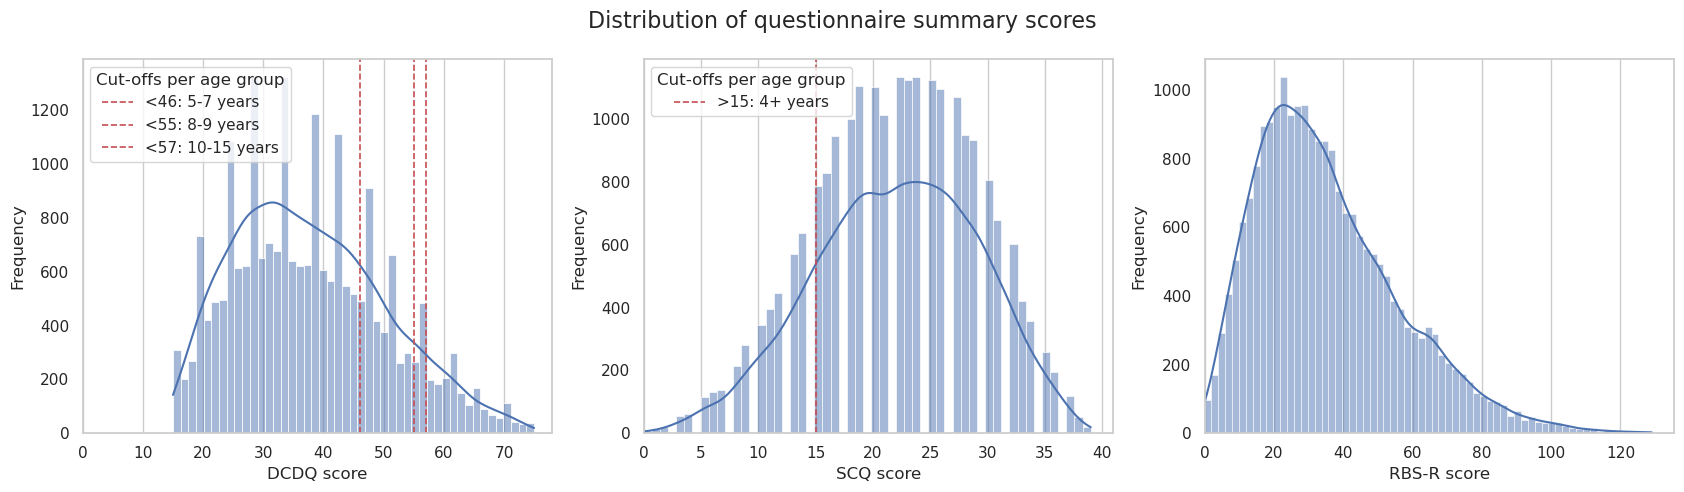

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Set the style of the visualization
# sns.set_theme(style="whitegrid")

# Create a figure with subplots for each score
fig, axes = plt.subplots(nrows=1, ncols=len(scores_df.columns), figsize=(17, 5))
score_names = {'dcdq_score': 'DCDQ score', 'rbsr_score':'RBS-R score' , 'scq_score':'SCQ score' }

# Plot the distribution of each score
for i, score in enumerate(scores_df.columns):
    sns.histplot(scores_df[score].dropna(), kde=True, ax=axes[i])
    # axes[i].set_title(f'Distribution of {score_names[score]}')
    axes[i].set_xlabel(score_names[score])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(left=0)
    axes[i].yaxis.grid(False)
    
    # Add vertical lines for cutoff points
    legend_elements = []
    for cutoff in cutoff_points.get(score, []):
        axes[i].axvline(cutoff, color='r', linestyle='--', linewidth=1.2)
        legend_elements.append(Line2D([0], [0], color='r', linestyle='--', linewidth=1.2, label=explanations[cutoff]))
    
    # Add legend with explanations
    if legend_elements:
        axes[i].legend(handles=legend_elements, loc='upper left', title='Cut-offs per age group')

# Adjust layout
fig.suptitle('Distribution of questionnaire summary scores', fontsize=16)
plt.tight_layout()
# plt.savefig('./figures/summary_scores_distribution.pdf')

/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eidf128/eidf128/stirkova_big_eidf/.conda/envs/ip/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


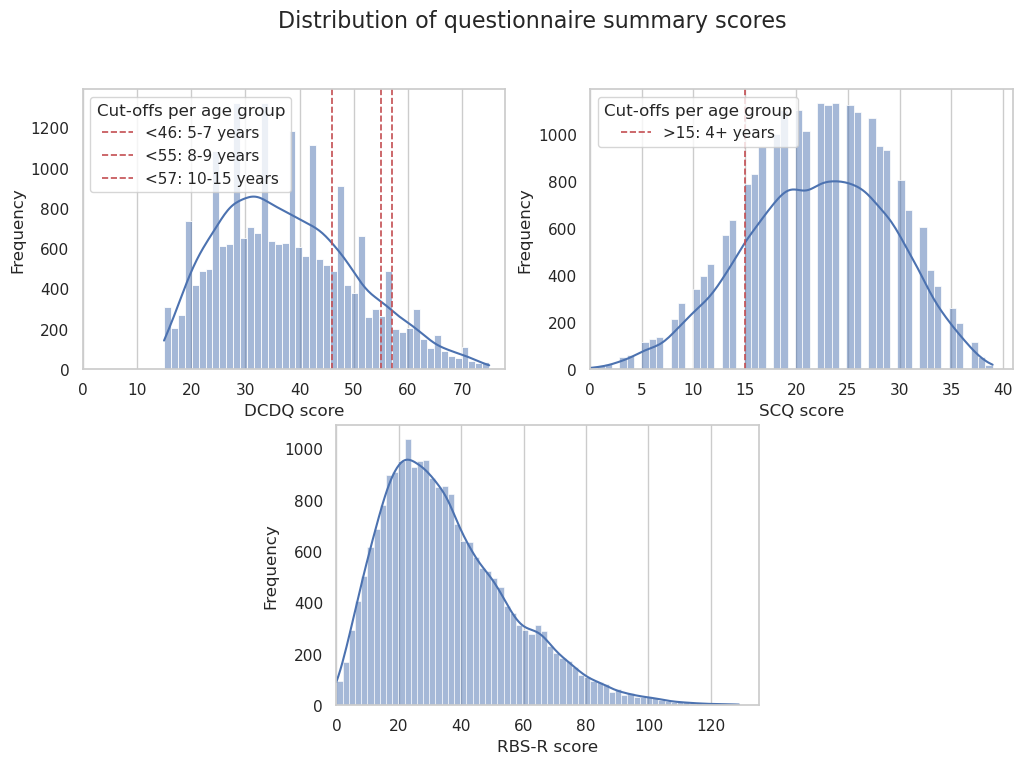

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

# Set the style of the visualization
# sns.set_theme(style="whitegrid")

# Create a figure with a custom GridSpec layout
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :2], )
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 1:3])

# Create subplots
axes = [ax1, ax2, ax3]
score_names = {'dcdq_score': 'DCDQ score', 'rbsr_score':'RBS-R score' , 'scq_score':'SCQ score' }

# Plot the distribution of each score
for i, score in enumerate(scores_df.columns):
    sns.histplot(scores_df[score].dropna(), kde=True, ax=axes[i])
    axes[i].set_xlabel(score_names[score])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(left=0)
    axes[i].yaxis.grid(False)
    
    # Add vertical lines for cutoff points
    legend_elements = []
    for cutoff in cutoff_points.get(score, []):
        axes[i].axvline(cutoff, color='r', linestyle='--', linewidth=1.2)
        legend_elements.append(Line2D([0], [0], color='r', linestyle='--', linewidth=1.2, label=explanations[cutoff]))
    
    # Add legend with explanations
    if legend_elements:
        axes[i].legend(handles=legend_elements, loc='upper left', title='Cut-offs per age group')

# Add an overall title
fig.suptitle('Distribution of questionnaire summary scores', fontsize=16)

# Adjust layout
# plt.tight_layout()  # Adjust rect to make room for the suptitle
# plt.savefig('./figures/summary_scores_distribution_larger.pdf')
plt.show()